### Sistem Floating-Point

Bilangan di sistem floating-point direpresentasikan sebagai deret dari bit dimana bit-bit tersebut merepresentasikan suatu angka yang berbeda. Secara umum, sistem floating-point ternormalisasi dapat ditulis sebagai 

$$F = \pm d_1 . d_2 d_3 d_4 \ldots d_p \times \beta^E$$

dimana
1. $\pm$ adalah bit yang merepresentasikan tanda dari bilangan
2. $d_1 . d_2 d_3 d_4 \ldots d_t$ disebut *mantissa*.  The digits $d_2 d_3 d_4 \ldots d_p$ disebut the *fraction/fraksi* dengan $t$ digit presisi.  Sistem ternormalisasi secara spesifik $d_1 \neq 0$ kecuali bilangan tersebut adalah $0$.
3. $\beta$ adalah *basis*.  Untuk binary $\beta = 2$, untuk desimal $\beta = 10$, dst.
4. $E$ adalah *eksponen*, suatu bilangan bulat antara $[E_{\min}, E_{\max}]$.

Bagian penting dalam sistem floating-point yaitu
1. Terdapat himpunan diskrit dan berhingga yang merepresentasikan suatu bilangan
2. Dapat merepresentasikan bilangan yang tidak terdisrtibusi secara teratur pada garis bilangan (real)
3. Aritmatika di dalam sistem floating-point menghasilkan hasil yang berbeda dibandingkan dengan aritmatika di dalam sistem bilangan real

Sifat-Sifat dari sistem floating-point

Semua sistem floating-point juga berupa beberapa bilangan yang penting:
 - Bilangan ternormalisasi terkecil (underflow)
 - Bilangan ternormalisasi terbesar (overflow)
 - Nol
 - Machine $\epsilon$ atau $\epsilon_{\text{machine}}$
 - `inf` dan `nan`, tak hingga dan **N**ot **a** **N**umber

Contoh:
Misalkan terdapat sistem desimal 2-digit (ternormalisasi)

$$f = \pm d_1 . d_2 \times 10^E$$

dengan $E \in [-2, 0]$.

**Bilangan dan distribusi dari bilangan**
1. Berapa banyak bilangan yang dapat direpresentasikan dengan sistem ini?

2. Bagaimana distribusinya pada garis bilangan "real"?

3. Apa nilai dari underflow dan overflow?


Berapa banyak bilangan yang dapat direpresentasikan dengan sistem ini?

$$
    f = \pm d_1 . d_2 \times 10^E ~~~  E \in [-2, 0]
$$

$$ 
    2 \times 9 \times 10 \times 3 + 1 = 541
$$

In [2]:
import matplotlib.pyplot as plt

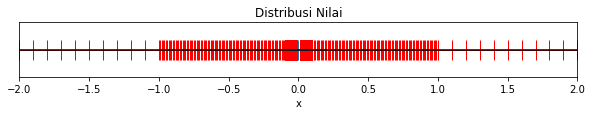

In [3]:
nilai_d1 = [1, 2, 3, 4, 5, 6, 7, 8, 9]
nilai_d2 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
nilai_E = [0, -1, -2]

fig = plt.figure(figsize=(10.0, 1.0))
ax = fig.add_subplot(1, 1, 1)

for E in nilai_E:
    for d1 in nilai_d1:
        for d2 in nilai_d2:
            ax.plot( (d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            ax.plot(-(d1 + d2 * 0.1) * 10**E, 0.0, 'r+', markersize=20)
            
ax.plot(0.0, 0.0, '+', markersize=20)
ax.plot([-10.0, 10.0], [0.0, 0.0], 'k')

ax.set_title("Distribusi Nilai")
ax.set_yticks([])
ax.set_xlabel("x")
ax.set_ylabel("")
ax.set_xlim([-2, 2])
plt.show()

Apa nilai dari underflow dan overflow?

Bilangan terkecil dapat direpresentasikan dengan underflow:  $1.0 \times 10^{-2} = 0.5$

Bilangan terbesar dapat direpresentasikan dengan overflow:  $1.9 \times 10^0 = 1.9$

Catatan bahwa semua sistem floating-point IEEE 754 menggunakan bilangan binari.  

Cara cepat:
$$
    2^3 2^2 2^1 2^0 . 2^{-1} 2^{-2} 2^{-3}
$$
melambangkan 8, 4, 2, 1 . 1/2, 1/4, 1/8, ...

### Real Systems - IEEE 754 Binary Floating Point Systems

#### Single Precision
 - Total storage yang dialokasi adalah 32 bit
 - Eksponen is 8 bit $\Rightarrow E \in [-126, 127]$
 - Fraksi 23 bit ($p = 24$)
 
```
s EEEEEEEE FFFFFFFFFFFFFFFFFFFFFFF
0 1      8 9                     31
```
* Overflow $= 2^{127} \approx 3.4 \times 10^{38}$
* Underflow $= 2^{-126} \approx 1.2 \times 10^{-38}$
* $\epsilon_{\text{machine}} = 2^{-23} \approx 1.2 \times 10^{-7}$

#### Double Precision
 - Total storage yang dialokasi adalah 64 bit
 - Eksponen is 11 bit $\Rightarrow E \in [-1022, 1024]$
 - Fraksi 52 bit ($p = 53$)
 
```
s EEEEEEEEEE FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FFFFFFFFFF FF
0 1       11 12                                                      63
```
* Overflow $= 2^{1024} \approx 1.8 \times 10^{308}$
* Underflow $= 2^{-1022} \approx 2.2 \times 10^{-308}$
* $\epsilon_{\text{machine}} = 2^{-52} \approx 2.2 \times 10^{-16}$

### IEEE Numbers di Python

Informasi mengenai parameter-parameter penting terkait dengan sistem floating-point, seperti machine epsilon:

```python
numpy.finfo(float).eps
```

In [4]:
import numpy

print(numpy.finfo(numpy.float16))
print(numpy.finfo(numpy.float32))

Machine parameters for float16
---------------------------------------------------------------
precision =   3   resolution = 1.00040e-03
machep =    -10   eps =        9.76562e-04
negep =     -11   epsneg =     4.88281e-04
minexp =    -14   tiny =       6.10352e-05
maxexp =     16   max =        6.55040e+04
nexp =        5   min =        -max
---------------------------------------------------------------

Machine parameters for float32
---------------------------------------------------------------
precision =   6   resolution = 1.0000000e-06
machep =    -23   eps =        1.1920929e-07
negep =     -24   epsneg =     5.9604645e-08
minexp =   -126   tiny =       1.1754944e-38
maxexp =    128   max =        3.4028235e+38
nexp =        8   min =        -max
---------------------------------------------------------------



In [5]:
print(numpy.finfo(float))

Machine parameters for float64
---------------------------------------------------------------
precision =  15   resolution = 1.0000000000000001e-15
machep =    -52   eps =        2.2204460492503131e-16
negep =     -53   epsneg =     1.1102230246251565e-16
minexp =  -1022   tiny =       2.2250738585072014e-308
maxexp =   1024   max =        1.7976931348623157e+308
nexp =       11   min =        -max
---------------------------------------------------------------



### Contoh

In [6]:
eps = numpy.finfo(float).eps
MAX = numpy.finfo(float).max
print('eps = {}'.format(eps))
print('MAX = {}'.format(MAX))

eps = 2.220446049250313e-16
MAX = 1.7976931348623157e+308


Tunjukan bahwa $(1 + \epsilon_{mach}) > 1$

In [7]:
print(MAX*1)
print(MAX*(1+eps))

1.7976931348623157e+308
inf


/var/folders/d8/_nrt2sy9567f87n08gxx0xc00000gn/T/ipykernel_2773/1801764505.py:2: RuntimeWarning: overflow encountered in double_scalars
  print(MAX*(1+eps))


## Kenapa kita perlu mengetahuinya?

 - Aritmatika Floating point tidak komutatif atau asosiatif
 - Mencampur presisi berbahaya

### Contoh 1: Aritmatika Sederhana
 
Aritmatika sederhana $\delta < \epsilon_{\text{machine}}$

   $$(1+\delta) - 1 = 1 - 1 = 0$$

   $$1 - 1 + \delta = \delta$$

In [8]:
eps = numpy.finfo(float).eps
delta = 0.5*eps
print('eps =   {},  1 + eps   > 1 is {}'.format(eps,((1. + eps) > 1.)))
print('delta = {}, 1 + delta > 1 is {}'.format(delta,((1. + delta) > 1.)))
x = 1+delta  -1
y = 1 - 1 + delta
print()
print('1 + delta - 1 = {}'.format(x))
print('1 - 1 + delta = {}'.format(y))

eps =   2.220446049250313e-16,  1 + eps   > 1 is True
delta = 1.1102230246251565e-16, 1 + delta > 1 is False

1 + delta - 1 = 0.0
1 - 1 + delta = 1.1102230246251565e-16


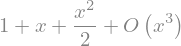

In [9]:
import sympy
sympy.init_printing(pretty_print=True)
x = sympy.symbols('x')
f = sympy.exp(x)
f.series(x0=0, n=3)

In [10]:
x = 1.
Tn = 1 + x + x**2/2 # solusi aproksimasi dari f(x) = e^x
f = numpy.exp(1.) # nilai eksak
E_t = numpy.abs(f - Tn) # nilai error absolut
epsilon_t = E_t/f # nilai error relatif
print("T_n = {}, E_t = {}, epsilon_t = {}". format(Tn, E_t, epsilon_t))

T_n = 2.5, E_t = 0.2182818284590451, epsilon_t = 0.08030139707139415


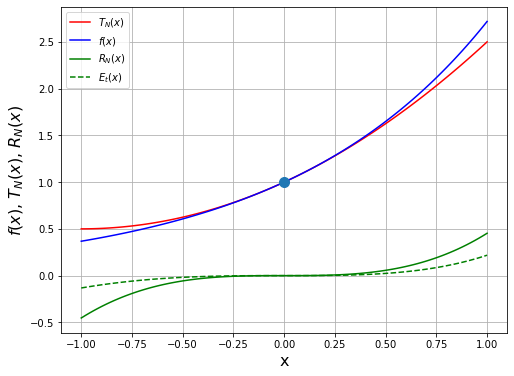

In [11]:
x = numpy.linspace(-1, 1, 100) # membuat sumbu-x
f = numpy.exp(x) # nilai eksak
T_N = 1.0 + x + x**2/2.0 
R_N = numpy.exp(1) * x**3/6.0

plt.figure(figsize=(8,6))
plt.plot(x, T_N, 'r', x, f, 'b', x, R_N, 'g')
plt.plot(x, numpy.exp(x) - T_N, 'g--')
plt.plot(0.0, 1.0, 'o', markersize=10)
plt.grid()
plt.xlabel('x', fontsize=16)
plt.ylabel("$f(x)$, $T_N(x)$, $R_N(x)$", fontsize=16)
plt.legend(["$T_N(x)$", "$f(x)$", "$R_N(x)$", "$E_t(x)$"], loc=2)
plt.show();